In [1]:
# importacion de librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# creacion del dataset
df = pd.read_csv('train.csv', index_col='ID')

In [3]:
# exploracion inicial de datos
df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
ID,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692500 entries, 904256 to 933374
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   PERIODO                         692500 non-null  int64 
 1   ESTU_PRGM_ACADEMICO             692500 non-null  object
 2   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 3   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 4   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 5   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 6   FAMI_TIENEINTERNET              665871 non-null  object
 7   FAMI_EDUCACIONPADRE             669322 non-null  object
 8   FAMI_EDUCACIONMADRE             668836 non-null  object
 9   ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 10  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(1), object(10)
memory usage: 63.4+ MB


In [5]:
# porcentaje de valores nulos
for col in df.columns:
  porcentaje = df[col].isna().sum() / df.shape[0]
  print(f'{col}: {porcentaje:.3%}')

PERIODO: 0.000%
ESTU_PRGM_ACADEMICO: 0.000%
ESTU_PRGM_DEPARTAMENTO: 0.000%
ESTU_VALORMATRICULAUNIVERSIDAD: 0.908%
ESTU_HORASSEMANATRABAJA: 4.456%
FAMI_ESTRATOVIVIENDA: 4.641%
FAMI_TIENEINTERNET: 3.845%
FAMI_EDUCACIONPADRE: 3.347%
FAMI_EDUCACIONMADRE: 3.417%
ESTU_PAGOMATRICULAPROPIO: 0.938%
RENDIMIENTO_GLOBAL: 0.000%


In [6]:
# convertir la variable de internet
def convertir_famitieneinternet(df):
    x_n = df['FAMI_TIENEINTERNET'].isna().sum()
    x_si = (df['FAMI_TIENEINTERNET'] == 'Si').sum()/(df.shape[0]-x_n)
    x_no = (df['FAMI_TIENEINTERNET'] == 'No').sum()/(df.shape[0]-x_n)
    x = np.random.choice([1, 0], size = x_n, p = [round(x_si, 3), round(x_no, 3)])
    fami_tieneinternet = df['FAMI_TIENEINTERNET'].to_numpy()
    acumulado = 0
    for i in range(len(fami_tieneinternet)):
        if fami_tieneinternet[i] == 'Si':
            fami_tieneinternet[i] = 1
        elif fami_tieneinternet[i] == 'No':
            fami_tieneinternet[i] = 0
        else:
            fami_tieneinternet[i] = x[acumulado]
            acumulado = acumulado + 1

In [7]:
# convertir la variable de pago de matricula
def convertir_estupagopropio(df):
    x_n = df['ESTU_PAGOMATRICULAPROPIO'].isna().sum()
    x_1 = (df['ESTU_PAGOMATRICULAPROPIO'] == 'Si').sum()/(df.shape[0]-x_n)
    x_2 = (df['ESTU_PAGOMATRICULAPROPIO'] == 'No').sum()/(df.shape[0]-x_n)
    x = np.random.choice([1, 0], size = x_n, p = [round(x_1, 2), round(x_2, 2)]) # arreglo de 1s-0s
    estu_pagomat = df['ESTU_PAGOMATRICULAPROPIO'].to_numpy()
    acumulado = 0
    for i in range(len(estu_pagomat)):
        if estu_pagomat[i] == 'Si':
            estu_pagomat[i] = 1
        elif estu_pagomat[i] == 'No':
            estu_pagomat[i] = 0
        else:
            estu_pagomat[i] = x[acumulado]
            acumulado = acumulado + 1

In [8]:
# convertir la variable de rendimiento global
def convertir_rendimientoglobal(df):
    rendimiento = df['RENDIMIENTO_GLOBAL'].to_numpy()
    for i in range(len(rendimiento)):
        if rendimiento[i] == 'bajo':
            rendimiento[i] = 0
        elif rendimiento[i] == 'medio-bajo':
            rendimiento[i] = 1
        elif rendimiento[i] == 'medio-alto':
            rendimiento[i] = 2
        else:
            rendimiento[i] = 3

In [9]:
# convertir la variable de estrato
def convertir_famiestrato(df):
    v = ['Sin Estrato', 'Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6']
    x = np.zeros(7)
    x_n = df['FAMI_ESTRATOVIVIENDA'].isna().sum()
    for i in range(7):
        x[i] = (df['FAMI_ESTRATOVIVIENDA'] == v[i]).sum()/(df.shape[0]-x_n)
    fami_estrato = df['FAMI_ESTRATOVIVIENDA'].to_numpy()
    y = np.random.choice([0, 1, 2, 3, 4, 5, 6], size = x_n, p = x)
    acumulado = 0
    for i in range(len(fami_estrato)):
        if fami_estrato[i] == v[0]:
            fami_estrato[i] = 0
        elif fami_estrato[i] == v[1]:
            fami_estrato[i] = 1
        elif fami_estrato[i] == v[2]:
            fami_estrato[i] = 2
        elif fami_estrato[i] == v[3]:
            fami_estrato[i] = 3
        elif fami_estrato[i] == v[4]:
            fami_estrato[i] = 4
        elif fami_estrato[i] == v[5]:
            fami_estrato[i] = 5
        elif fami_estrato[i] == v[6]:
            fami_estrato[i] = 6
        else:
            fami_estrato[i] = y[acumulado]
            acumulado = acumulado + 1

In [10]:
# convertir la variable de horas trabajo
def convertir_horastrab(df):
    v = ['0', 'Menos de 10 horas', 'Entre 11 y 20 horas', 'Entre 21 y 30 horas', 'Más de 30 horas']
    x = np.zeros(5)
    x_n = df['ESTU_HORASSEMANATRABAJA'].isna().sum()
    for i in range(5):
        x[i] = (df['ESTU_HORASSEMANATRABAJA'] == v[i]).sum()/(df.shape[0]-x_n)
    horas = df['ESTU_HORASSEMANATRABAJA'].to_numpy()
    y = np.random.choice([0, 1, 2, 3, 4], size = x_n, p = x)
    acumulado = 0
    for i in range(len(horas)):
        if horas[i] == v[0]:
            horas[i] = 0
        elif horas[i] == v[1]:
            horas[i] = 1
        elif horas[i] == v[2]:
            horas[i] = 2
        elif horas[i] == v[3]:
            horas[i] = 3
        elif horas[i] == v[4]:
            horas[i] = 4
        else:
            horas[i] = y[acumulado]
            acumulado = acumulado + 1

In [11]:
# convertir la variable de estudio de los padres
def convertir_edupadres(df):
    v = ['No Aplica', 'No sabe', 'Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta',
         'Secundaria (Bachillerato) completa', 'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa',
         'Educación profesional incompleta', 'Educación profesional completa', 'Postgrado']
    x = np.zeros((2, len(v)))
    x_np = df['FAMI_EDUCACIONPADRE'].isna().sum()
    x_nm = df['FAMI_EDUCACIONMADRE'].isna().sum()
    for i in range(len(v)):
        x[0][i] = (df['FAMI_EDUCACIONPADRE'] == v[i]).sum()/(df.shape[0]-x_np)
        x[1][i] = (df['FAMI_EDUCACIONMADRE'] == v[i]).sum()/(df.shape[0]-x_nm)
    edu_padre = df['FAMI_EDUCACIONPADRE'].to_numpy()
    edu_madre = df['FAMI_EDUCACIONMADRE'].to_numpy()
    y_1 = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], size = x_np, p = x[0])
    y_2 = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], size = x_nm, p = x[1])
    acumulado = 0
    for i in range(len(edu_padre)):
        if edu_padre[i] == v[0]:
            edu_padre[i] = 0
        elif edu_padre[i] == v[1]:
            edu_padre[i] = 1
        elif edu_padre[i] == v[2]:
            edu_padre[i] = 2
        elif edu_padre[i] == v[3]:
            edu_padre[i] = 3
        elif edu_padre[i] == v[4]:
            edu_padre[i] = 4
        elif edu_padre[i] == v[5]:
            edu_padre[i] = 5
        elif edu_padre[i] == v[6]:
            edu_padre[i] = 6
        elif edu_padre[i] == v[7]:
            edu_padre[i] = 7
        elif edu_padre[i] == v[8]:
            edu_padre[i] = 8
        elif edu_padre[i] == v[9]:
            edu_padre[i] = 9
        elif edu_padre[i] == v[10]:
            edu_padre[i] = 10
        elif edu_padre[i] == v[11]:
            edu_padre[i] = 11
        else:
            edu_padre[i] = y_1[acumulado]
            acumulado = acumulado + 1
    acumulado = 0
    for i in range(len(edu_madre)):
        if edu_madre[i] == v[0]:
            edu_madre[i] = 0
        elif edu_madre[i] == v[1]:
            edu_madre[i] = 1
        elif edu_madre[i] == v[2]:
            edu_madre[i] = 2
        elif edu_madre[i] == v[3]:
            edu_madre[i] = 3
        elif edu_madre[i] == v[4]:
            edu_madre[i] = 4
        elif edu_madre[i] == v[5]:
            edu_madre[i] = 5
        elif edu_madre[i] == v[6]:
            edu_madre[i] = 6
        elif edu_madre[i] == v[7]:
            edu_madre[i] = 7
        elif edu_madre[i] == v[8]:
            edu_madre[i] = 8
        elif edu_madre[i] == v[9]:
            edu_madre[i] = 9
        elif edu_madre[i] == v[10]:
            edu_madre[i] = 10
        elif edu_madre[i] == v[11]:
            edu_madre[i] = 11
        else:
            edu_madre[i] = y_2[acumulado]
            acumulado = acumulado + 1

In [12]:
# convertir variable de valor de matricula
def convertir_vmatricula(df):
    v = ['No pagó matrícula', 'Menos de 500 mil', 'Entre 500 mil y menos de 1 millón', 'Entre 1 millón y menos de 2.5 millones',
         'Entre 2.5 millones y menos de 4 millones', 'Entre 4 millones y menos de 5.5 millones', 'Entre 5.5 millones y menos de 7 millones',
         'Más de 7 millones']
    x = np.zeros(len(v))
    x_n = df['ESTU_VALORMATRICULAUNIVERSIDAD'].isna().sum()
    for i in range(len(x)):
        x[i] = (df['ESTU_VALORMATRICULAUNIVERSIDAD'] == v[i]).sum()/(df.shape[0]-x_n)
    vmatricula = df['ESTU_VALORMATRICULAUNIVERSIDAD'].to_numpy()
    y = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7], size = x_n, p = x)
    acumulado = 0
    for i in range(len(vmatricula)):
        if vmatricula[i] == v[0]:
            vmatricula[i] = 0
        elif vmatricula[i] == v[1]:
            vmatricula[i] = 1
        elif vmatricula[i] == v[2]:
            vmatricula[i] = 2
        elif vmatricula[i] == v[3]:
            vmatricula[i] = 3
        elif vmatricula[i] == v[4]:
            vmatricula[i] = 4
        elif vmatricula[i] == v[5]:
            vmatricula[i] = 5
        elif vmatricula[i] == v[6]:
            vmatricula[i] = 6
        elif vmatricula[i] == v[7]:
            vmatricula[i] = 7
        else:
            vmatricula[i] = y[acumulado]
            acumulado = acumulado + 1

In [13]:
# aplicar conversiones
convertir_famitieneinternet(df)
convertir_estupagopropio(df)
convertir_rendimientoglobal(df)
convertir_famiestrato(df)
convertir_horastrab(df)
convertir_edupadres(df)
convertir_vmatricula(df)

In [14]:
# numero de programas academicos que tiene cada departamento
x = df.ESTU_PRGM_DEPARTAMENTO.unique()
for i in x:
  porcentaje = (df.ESTU_PRGM_DEPARTAMENTO == i).sum() / df.shape[0]
  programas = df[df.ESTU_PRGM_DEPARTAMENTO == i].ESTU_PRGM_ACADEMICO.unique().shape[0]
  print(f'{i}: {porcentaje:.3%}, {programas}')

BOGOTÁ: 40.745%, 462
ATLANTICO: 5.923%, 131
SANTANDER: 4.163%, 135
ANTIOQUIA: 12.073%, 322
HUILA: 1.443%, 56
SUCRE: 1.253%, 40
CAQUETA: 0.384%, 23
CUNDINAMARCA: 2.024%, 71
BOLIVAR: 2.979%, 93
TOLIMA: 1.721%, 67
VALLE: 6.439%, 171
QUINDIO: 1.188%, 47
RISARALDA: 1.831%, 83
CORDOBA: 1.760%, 51
META: 1.142%, 50
LA GUAJIRA: 0.690%, 22
BOYACA: 2.029%, 81
NARIÑO: 1.943%, 69
CAUCA: 1.656%, 69
NORTE SANTANDER: 3.262%, 84
CESAR: 1.196%, 36
PUTUMAYO: 0.115%, 10
CALDAS: 1.681%, 79
MAGDALENA: 1.374%, 46
CHOCO: 0.619%, 29
CASANARE: 0.267%, 30
ARAUCA: 0.085%, 8
GUAVIARE: 0.005%, 1
AMAZONAS: 0.006%, 2
VAUPES: 0.002%, 1
SAN ANDRES: 0.001%, 1


In [15]:
# visualizacion de los estratos
x_0 = np.zeros(7)
x_1 = np.zeros(7)
x_2 = np.zeros(7)
x_3 = np.zeros(7)
a = 0
for i in range(7):
    a = (df['FAMI_ESTRATOVIVIENDA'] == i).sum()
    x_0[i] = ((df['FAMI_ESTRATOVIVIENDA'] == i) & (df['RENDIMIENTO_GLOBAL'] == 0)).sum()*100/a
    x_1[i] = ((df['FAMI_ESTRATOVIVIENDA'] == i) & (df['RENDIMIENTO_GLOBAL'] == 1)).sum()*100/a
    x_2[i] = ((df['FAMI_ESTRATOVIVIENDA'] == i) & (df['RENDIMIENTO_GLOBAL'] == 2)).sum()*100/a
    x_3[i] = ((df['FAMI_ESTRATOVIVIENDA'] == i) & (df['RENDIMIENTO_GLOBAL'] == 3)).sum()*100/a

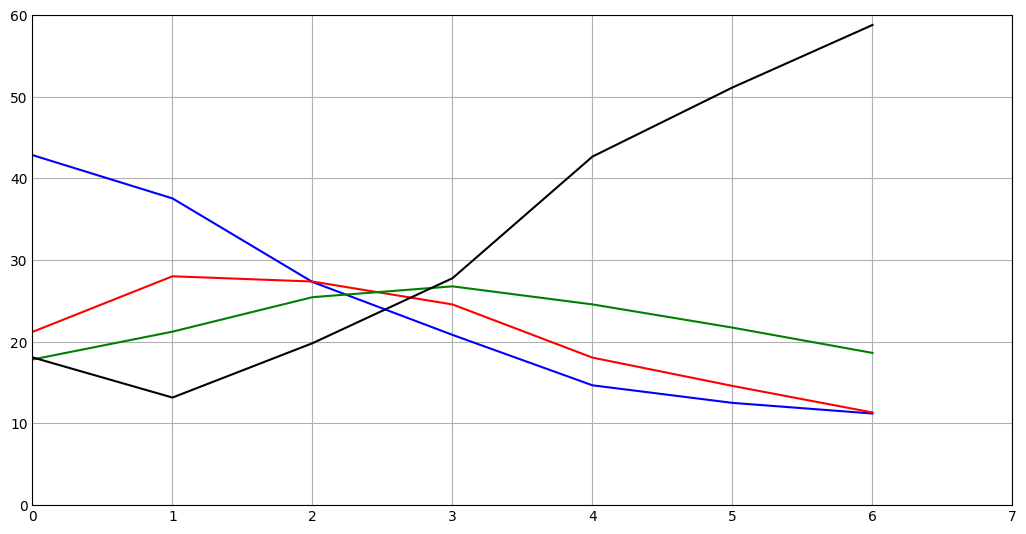

In [16]:
plt.style.use('_mpl-gallery')
x = list(range(7))
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(x, x_0, color = 'b')
ax.plot(x, x_1, color = 'r')
ax.plot(x, x_2, color = 'g')
ax.plot(x, x_3, color = 'k')

ax.set(xlim=(0, 7), ylim=(0, 60))

plt.show()

In [17]:
# convertir la variable de departamento
def convertir_departamento(df):
    v = ['SANTANDER', 'BOGOTÁ', 'CUNDINAMARCA', 'CALDAS', 'ANTIOQUIA', 'VALLE', 'BOYACA', 'NARIÑO', 'RISARALDA', 'META', 'QUINDIO', 'ATLANTICO',
        'VAUPES', 'HUILA', 'TOLIMA', 'CESAR', 'MAGDALENA', 'NORTE SANTANDER', 'CAUCA', 'SUCRE', 'CASANARE', 'CAQUETA', 'CORDOBA', 'BOLIVAR',
        'AMAZONAS', 'PUTUMAYO', 'ARAUCA', 'GUAVIARE', 'SAN ANDRES', 'LA GUAJIRA', 'CHOCO']
    departamento = df['ESTU_PRGM_DEPARTAMENTO'].to_numpy()
    for i in range(len(departamento)):
        if departamento[i] == v[0]:
            departamento[i] = 0
        elif departamento[i] == v[1]:
            departamento[i] = 1
        elif departamento[i] == v[2]:
            departamento[i] = 2
        elif departamento[i] == v[3]:
            departamento[i] = 3
        elif departamento[i] == v[4]:
            departamento[i] = 4
        elif departamento[i] == v[5]:
            departamento[i] = 5
        elif departamento[i] == v[6]:
            departamento[i] = 6
        elif departamento[i] == v[7]:
            departamento[i] = 7
        elif departamento[i] == v[8]:
            departamento[i] = 8
        elif departamento[i] == v[9]:
            departamento[i] = 9
        elif departamento[i] == v[10]:
            departamento[i] = 10
        elif departamento[i] == v[11]:
            departamento[i] = 11
        elif departamento[i] == v[12]:
            departamento[i] = 12
        elif departamento[i] == v[13]:
            departamento[i] = 13
        elif departamento[i] == v[14]:
            departamento[i] = 14
        elif departamento[i] == v[15]:
            departamento[i] = 15
        elif departamento[i] == v[16]:
            departamento[i] = 16
        elif departamento[i] == v[17]:
            departamento[i] = 17
        elif departamento[i] == v[18]:
            departamento[i] = 18
        elif departamento[i] == v[19]:
            departamento[i] = 19
        elif departamento[i] == v[20]:
            departamento[i] = 20
        elif departamento[i] == v[21]:
            departamento[i] = 21
        elif departamento[i] == v[22]:
            departamento[i] = 22
        elif departamento[i] == v[23]:
            departamento[i] = 23
        elif departamento[i] == v[24]:
            departamento[i] = 24
        elif departamento[i] == v[25]:
            departamento[i] = 25
        elif departamento[i] == v[26]:
            departamento[i] = 26
        elif departamento[i] == v[27]:
            departamento[i] = 27
        elif departamento[i] == v[28]:
            departamento[i] = 28
        elif departamento[i] == v[29]:
            departamento[i] = 29
        elif departamento[i] == v[30]:
            departamento[i] = 30

convertir_departamento(df)

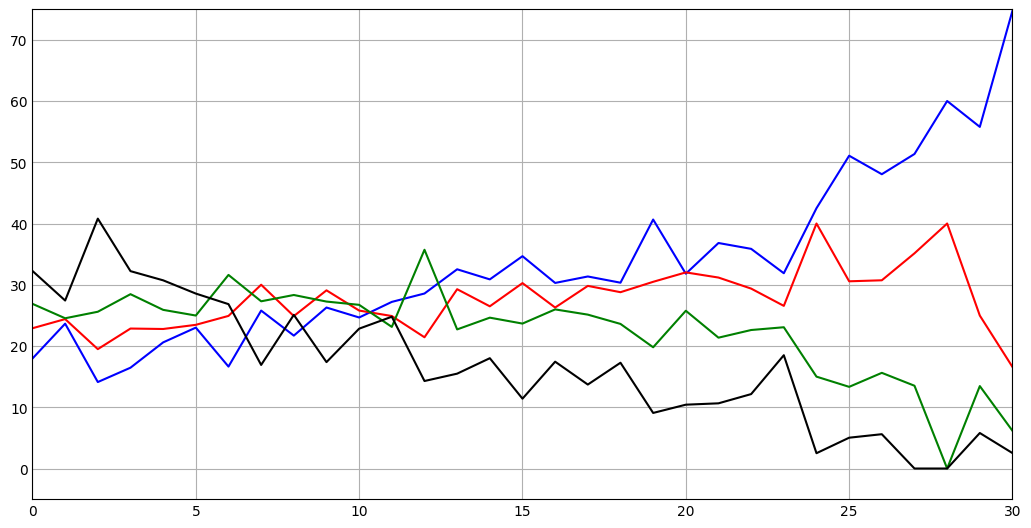

In [18]:
# visualizacion de departamento
x_1 = np.zeros(31)
x_2 = np.zeros(31)
x_3 = np.zeros(31)
x_4 = np.zeros(31)
a = 0
for i in range(31):
    a = (df['ESTU_PRGM_DEPARTAMENTO'] == i).sum()
    x_1[i] = 100*(((df['ESTU_PRGM_DEPARTAMENTO'] == i) & (df['RENDIMIENTO_GLOBAL'] == 0)).sum()/a)
    x_2[i] = 100*(((df['ESTU_PRGM_DEPARTAMENTO'] == i) & (df['RENDIMIENTO_GLOBAL'] == 1)).sum()/a)
    x_3[i] = 100*(((df['ESTU_PRGM_DEPARTAMENTO'] == i) & (df['RENDIMIENTO_GLOBAL'] == 2)).sum()/a)
    x_4[i] = 100*(((df['ESTU_PRGM_DEPARTAMENTO'] == i) & (df['RENDIMIENTO_GLOBAL'] == 3)).sum()/a)

plt.style.use('_mpl-gallery')
x = list(range(31))
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(x, x_1, color = 'b')
ax.plot(x, x_2, color = 'r')
ax.plot(x, x_3, color = 'g')
ax.plot(x, x_4, color = 'k')

ax.set(xlim=(0, 30), ylim=(-5, 75))

plt.show()

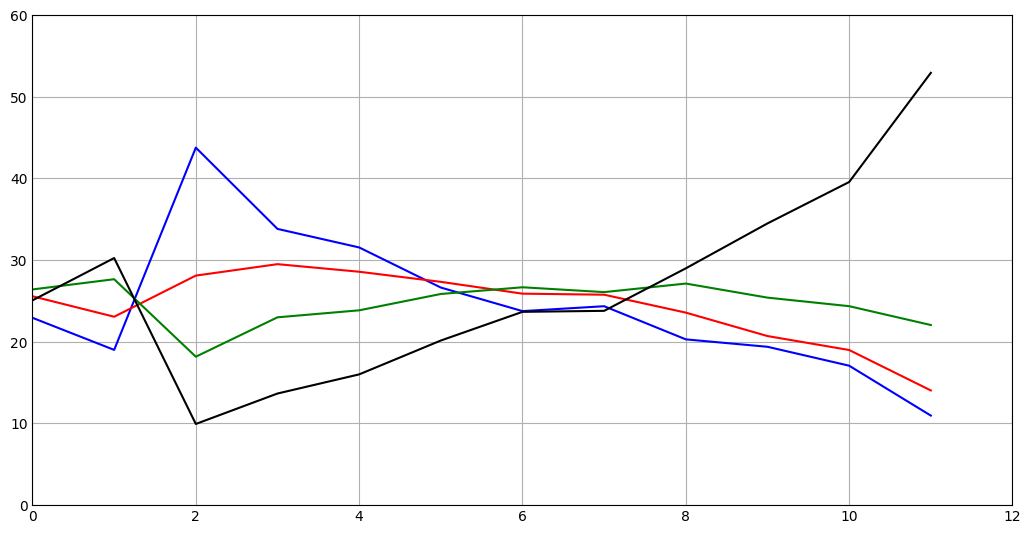

In [19]:
# visializacion de la educacion de los padres
x_0 = np.zeros(12)
x_1 = np.zeros(12)
x_2 = np.zeros(12)
x_3 = np.zeros(12)
a = 0
for i in range(12):
    a = (df['FAMI_EDUCACIONPADRE'] == i).sum()
    x_0[i] = ((df['FAMI_EDUCACIONPADRE'] == i) & (df['RENDIMIENTO_GLOBAL'] == 0)).sum()*100/a
    x_1[i] = ((df['FAMI_EDUCACIONPADRE'] == i) & (df['RENDIMIENTO_GLOBAL'] == 1)).sum()*100/a
    x_2[i] = ((df['FAMI_EDUCACIONPADRE'] == i) & (df['RENDIMIENTO_GLOBAL'] == 2)).sum()*100/a
    x_3[i] = ((df['FAMI_EDUCACIONPADRE'] == i) & (df['RENDIMIENTO_GLOBAL'] == 3)).sum()*100/a

plt.style.use('_mpl-gallery')
x = list(range(12))
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(x, x_0, color = 'b')
ax.plot(x, x_1, color = 'r')
ax.plot(x, x_2, color = 'g')
ax.plot(x, x_3, color = 'k')

ax.set(xlim=(0, 12), ylim=(0, 60))

plt.show()

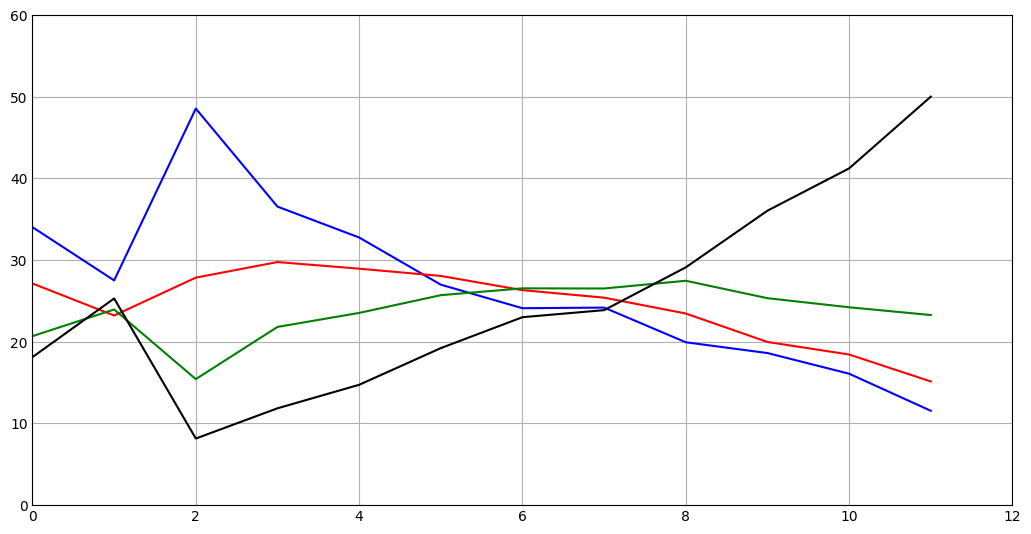

In [20]:
x_0 = np.zeros(12)
x_1 = np.zeros(12)
x_2 = np.zeros(12)
x_3 = np.zeros(12)
a = 0
for i in range(12):
    a = (df['FAMI_EDUCACIONMADRE'] == i).sum()
    x_0[i] = ((df['FAMI_EDUCACIONMADRE'] == i) & (df['RENDIMIENTO_GLOBAL'] == 0)).sum()*100/a
    x_1[i] = ((df['FAMI_EDUCACIONMADRE'] == i) & (df['RENDIMIENTO_GLOBAL'] == 1)).sum()*100/a
    x_2[i] = ((df['FAMI_EDUCACIONMADRE'] == i) & (df['RENDIMIENTO_GLOBAL'] == 2)).sum()*100/a
    x_3[i] = ((df['FAMI_EDUCACIONMADRE'] == i) & (df['RENDIMIENTO_GLOBAL'] == 3)).sum()*100/a

plt.style.use('_mpl-gallery')
x = list(range(12))
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(x, x_0, color = 'b')
ax.plot(x, x_1, color = 'r')
ax.plot(x, x_2, color = 'g')
ax.plot(x, x_3, color = 'k')

ax.set(xlim=(0, 12), ylim=(0, 60))

plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils
dff = df[['ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']]
train_df, test_df = train_test_split(dff, test_size=0.2)

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(train_df.RENDIMIENTO_GLOBAL)

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(train_df.drop(columns=['RENDIMIENTO_GLOBAL']), encoded)
y_pred = clf.predict(test_df.drop(columns=['RENDIMIENTO_GLOBAL']))
encoded = lab_enc.fit_transform(test_df.RENDIMIENTO_GLOBAL)
accuracy = accuracy_score(encoded, y_pred)
accuracy

0.3604115523465704

In [22]:
from sklearn.ensemble import RandomForestClassifier
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(train_df.RENDIMIENTO_GLOBAL)

model = RandomForestClassifier(n_estimators=6)
model.fit(train_df.drop(columns=['RENDIMIENTO_GLOBAL']), encoded)
y_pred = model.predict(test_df.drop(columns=['RENDIMIENTO_GLOBAL']))
encoded = lab_enc.fit_transform(test_df.RENDIMIENTO_GLOBAL)
accuracy = accuracy_score(encoded, y_pred)
accuracy

0.3537400722021661

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(train_df.RENDIMIENTO_GLOBAL)

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(train_df.drop(columns=['RENDIMIENTO_GLOBAL']), encoded)
y_pred = model.predict(test_df.drop(columns=['RENDIMIENTO_GLOBAL']))
encoded = lab_enc.fit_transform(test_df.RENDIMIENTO_GLOBAL)
accuracy = accuracy_score(encoded, y_pred)
accuracy

0.36293140794223827

In [24]:
# creacion del archivo csv
dfk = pd.read_csv('test.csv', index_col='ID')
convertir_departamento(dfk)
convertir_edupadres(dfk)
convertir_famiestrato(dfk)
dfk_f = dfk[['ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']]
encoded = lab_enc.fit_transform(dff.RENDIMIENTO_GLOBAL)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(dff.drop(columns=['RENDIMIENTO_GLOBAL']), encoded)
y_pred = model.predict(dfk_f)

In [25]:
y_predf = list(y_pred)
for i in range(len(y_pred)):
  if y_predf[i] == 0:
    y_predf[i] = 'bajo'
  elif y_predf[i] == 1:
    y_predf[i] = 'medio-bajo'
  elif y_predf[i] == 2:
    y_predf[i] = 'medio-alto'
  else:
    y_predf[i] = 'alto'

submission = pd.DataFrame([dfk.index, y_predf]).T
submission.columns = ['ID', 'RENDIMIENTO_GLOBAL']
submission.head()
submission.to_csv("submission.csv", index=False)
!head submission.csv

ID,RENDIMIENTO_GLOBAL
550236,bajo
98545,alto
499179,medio-alto
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,alto
519909,bajo
